##Homework 3 
##Amrit Parimi ap4142


**AdaGrad weight update equation**:$$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{G_{t} + \epsilon}} \odot g_{t}$$
where $\theta$ is the vector of parameters. $\eta$ is the learning rate. $\epsilon$ is a smoothing term that prevents division by $0$. $g_t$ is the gradient at time step $t$. $G_t$ is a diagonal matrix where each diagonal element $G_{t,ii} $ is the sum of squares of the gradients with respect to $\theta_i$ up to time step $t$. \\
$\eta$-learning rate is the only hyperparameter \\


**RMSProp weight update**:$$\begin{align} 
\begin{split} 
E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g^2_t \\
\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_{t} 
\end{split} 
\end{align}$$
Here, $E[g^2]_t$ is the running average of all past gradients squared at time t. $g_t$ is the gradient at time t. $ϵ$ is the smoothing term to prevent division by 0. \\
$\gamma$-momentum decay and $η$-learning rate are the hyperparameters. \\

**RMSProp + Nesterov weight update**:
$$\begin{align} 
\begin{split}
v_t = \rho v_{t-1} + (1 - \rho)g_t^2 \\
E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) v_t \\
\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_{t} 
\end{split} 
\end{align}$$
Here, $\rho$- decaying constant, $\eta$-learning rate $\gamma$-momentum decay term are the hyperparameters.

**AdaDelta weight update**:$$\begin{align} 
\begin{split} 
E[Δθ^2]_t = \rho E[Δθ^2]_{t-1} + (1 - \rho) Δθ^2 \\ 
\theta_{t+1} = \theta_{t} - \dfrac{\sqrt{E[Δθ^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} g_{t} 
\end{split} 
\end{align}$$
$E[Δθ^2]$ is the running average of the decayed squared parameter update. \\
$\rho$-decaying constant is the hyperparameter.

**Adam weight update**:$$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t \\
where\ \ \hat{m_t} = \frac{m_t}{1 - \rho_1^t} \\
\hat{v_t} = \frac{v_t}{1 - \rho_2^t} \\
and \ \ m_t = \rho_1m_{t-1} + (1 - \rho_1)g_t \\
 v_t = \rho_2v_{t-1} + (1 - \rho_2)g_t^2 $$

$m_t$ and $v_t$ are estimates of the first moment (the mean) and the second moment (the uncentered variance) of the gradients respectively.
$\hat{m_t}$ and $\hat{v_t}$ are unbiased estimates of the first moment (the mean) and the second moment of the gradients respectively. \\
Here, $\eta, \rho_1, \rho_2$ are the hyperparameters. \\

**Adam and Adadelta vs RMSProp**:
RMSProp is similar to Adadelta excpet that it uses RMS in theh numerator instead of the learniing rate. This helps us reduce a hyperparameter. And Adam corrects the bias making it unbiased and also adds momentum to the update.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape,y_train.shape)

170508288/170498071 [==============================] - 7s 0us/step
(50000, 32, 32, 3) (50000, 1)


In [ ]:
import tensorflow as tf
from keras.utils import np_utils
import keras
# one-hot encode the labels
num_classes = len(np.unique(y_train))
print(num_classes)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]
print(y_test.shape,y_valid.shape)
y_train.shape

10
(10000, 10) (5000, 10)


(45000, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
def create_model1():
    model = Sequential()
    model.add(Flatten(input_shape = x_train.shape[1:]))
    model.add(Dense(1000, activation='relu', kernel_regularizer='l2'))
    # model.add(Dropout(0.2))
    model.add(Dense(1000, activation='relu', kernel_regularizer='l2'))
    # model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [ ]:
def create_model2():
    model = Sequential()
    model.add(Flatten(input_shape = x_train.shape[1:]))
    model.add(Dropout(0.2))
    model.add(Dense(1000, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [ ]:
from keras.callbacks import ModelCheckpoint   

def train(model,f):
    checkpointer = ModelCheckpoint(filepath=f, verbose=0, 
                                save_best_only=True)
    hist = model.fit(x_train, y_train, batch_size=128, epochs=200,
            validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
            verbose=0, shuffle=True)
    return hist
train_times = []

In [ ]:
model1 = create_model1()
model1.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
hist1 = train(model1,'MLP.best_weights1.hdf5')
train_times.append(time.time()-s)

In [ ]:
model2 = create_model1()
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
hist2 = train(model2,'MLP.best_weights2.hdf5')
train_times.append(time.time()-s)


In [ ]:
# Here we used Nadam instead of rmsprop+nesterov momentum
model3 = create_model1()
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
hist3 = train(model3,'MLP.best_weights3.hdf5')
train_times.append(time.time()-s)


In [ ]:
model4 = create_model1()
model4.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
hist4 = train(model4,'MLP.best_weights4.hdf5')
train_times.append(time.time()-s)


In [ ]:
model5 = create_model1()
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
hist5 = train(model5,'MLP.best_weights5.hdf5')
train_times.append(time.time()-s)


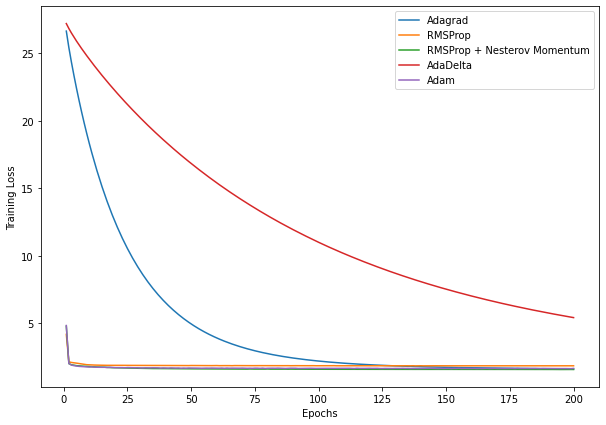

In [ ]:
plt.plot([i+1 for i in range(200)],hist1.history['loss'],label='Adagrad')
plt.plot([i+1 for i in range(200)],hist2.history['loss'],label='RMSProp')
plt.plot([i+1 for i in range(200)],hist3.history['loss'],label='RMSProp + Nesterov Momentum')
plt.plot([i+1 for i in range(200)],hist4.history['loss'],label='AdaDelta')
plt.plot([i+1 for i in range(200)],hist5.history['loss'],label='Adam')
plt.legend(loc='upper right')
plt.ylabel('Training Loss')
plt.xlabel('Epochs')
fig = plt.gcf()
fig.set_size_inches(10, 7)
# plt.ylim(0,5)
plt.show()

1.2 Nadam performs best and achieves the least loss as can be seen in the graph.

In [ ]:
model1.load_weights('MLP.best_weights1.hdf5')
mlp_score = model1.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.5031999945640564


In [ ]:
model2.load_weights('MLP.best_weights2.hdf5')
mlp_score = model2.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.41100001335144043


In [ ]:
model3.load_weights('MLP.best_weights3.hdf5')
mlp_score = model3.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.48420000076293945


In [ ]:
model4.load_weights('MLP.best_weights4.hdf5')
mlp_score = model4.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.4449999928474426


In [ ]:
model5.load_weights('MLP.best_weights5.hdf5')
mlp_score = model5.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.46369999647140503


1.3 Adding Dropout Layer

In [ ]:
import time
train_times_dropout = []

In [ ]:
modeld1 = create_model2()
modeld1.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
histd1 = train(modeld1,'MLP.best_weights1.hdf5')
train_times_dropout.append(time.time()-s)


In [ ]:
modeld2 = create_model2()
modeld2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
histd2 = train(modeld2,'MLP.best_weights2.hdf5')
train_times_dropout.append(time.time()-s)


In [ ]:
modeld3 = create_model2()
modeld3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
histd3 = train(modeld3,'MLP.best_weights3.hdf5')
train_times_dropout.append(time.time()-s)


In [ ]:
modeld4 = create_model2()
modeld4.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
histd4 = train(modeld4,'MLP.best_weights4.hdf5')
train_times_dropout.append(time.time()-s)


In [ ]:
modeld5 = create_model2()
modeld5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
s = time.time()
histd5 = train(modeld5,'MLP.best_weights5.hdf5')
train_times_dropout.append(time.time()-s)


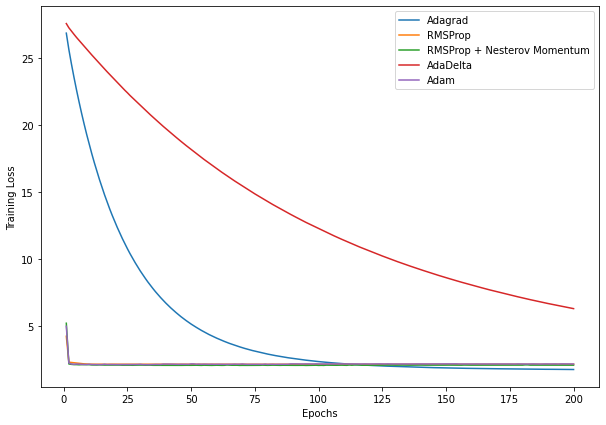

In [ ]:
plt.plot([i+1 for i in range(200)],histd1.history['loss'],label='Adagrad')
plt.plot([i+1 for i in range(200)],histd2.history['loss'],label='RMSProp')
plt.plot([i+1 for i in range(200)],histd3.history['loss'],label='RMSProp + Nesterov Momentum')
plt.plot([i+1 for i in range(200)],histd4.history['loss'],label='AdaDelta')
plt.plot([i+1 for i in range(200)],histd5.history['loss'],label='Adam')
plt.legend(loc='upper right')
plt.ylabel('Training Loss')
plt.xlabel('Epochs')
fig = plt.gcf()
fig.set_size_inches(10, 7)
# plt.ylim(0,5)
plt.show()

After adding dropout, the training losses have slightly increased when compared to without dropout for all the models. \\
Adagrad performs thhe best as can be seen in the graph with dropout

In [ ]:
modeld1.load_weights('MLP.best_weights1.hdf5')
mlp_score = modeld1.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.4805999994277954


In [ ]:
modeld2.load_weights('MLP.best_weights2.hdf5')
mlp_score = modeld2.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.3107999861240387


In [ ]:
modeld3.load_weights('MLP.best_weights3.hdf5')
mlp_score = modeld3.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.33390000462532043


In [ ]:
model4.load_weights('MLP.best_weights4.hdf5')
mlp_score = model4.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.39969998598098755


In [ ]:
model5.load_weights('MLP.best_weights5.hdf5')
mlp_score = model5.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.4722000062465668


In [ ]:
print(train_times)
print(train_times_dropout)

The training time while using dropout is slightly higher for all the 5 methods.

The training times without dropout are \\
 Adagrad: 473.6551239326846, RMSProp: 597.1264545598701, Nadam: 774.2560119758035, Adadelta: 510.25771594047546, Adam: 485.9768748626594
The training times with dropout are \\
 Adagrad: 485.1216578908032, RMSProp: 619.3265489090407, Nadam: 795.9480605789322, Adadelta: 526.6459204540786, Adam: 496.6264847750315
 

1.4. Test Accuracies: \\
Adagrad: 0.5031999945640564 \\
RMSProp: 0.41100001335144043 \\
Nadam: 0.48420000076293945 \\
AdaDelta: 0.4449999928474426 \\
Adam: 0.46369999647140503 \\
Adagrad achieves the highest test accuracy without dropout and RMSProp achieves the least


Test Accuracies with dropout: \\
Adagrad: 0.4805999994277954 \\
RMSProp: 0.3107999861240387 \\
Nadam: 0.33390000462532043 \\
AdaDelta: 0.39969998598098755 \\
Adam: 0.4722000062465668 \\
Adagrad achieves the highest test accuracy with dropout and RMSProp achieves the least

We can observe that all the 5 accuracies have decrease after using dropout.